In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from   statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa

%matplotlib inline

In [2]:
n = 600

# MA(1)
ar = np.r_[1, 0]
ma = np.r_[1, 0.7]
ma1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)

In [3]:
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

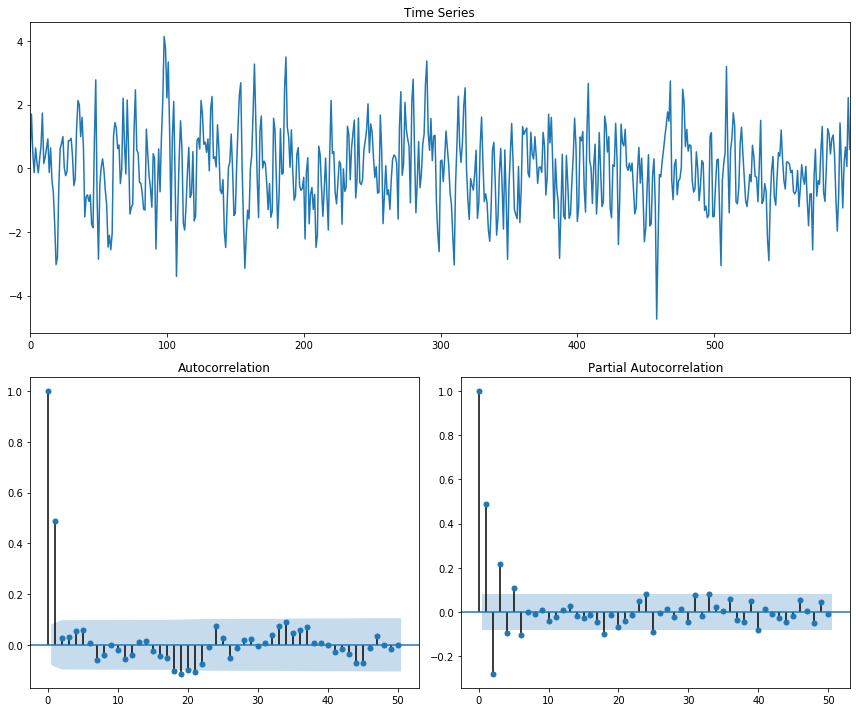

In [4]:
plotds(ma1_data)

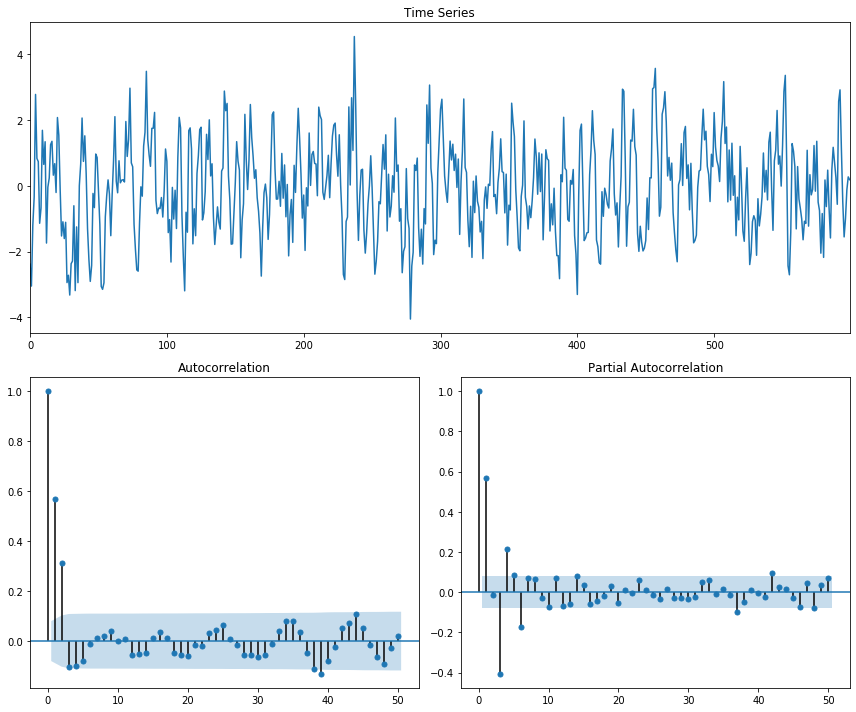

In [5]:
# MA(2)
ar = np.r_[1, 0]
ma = np.r_[1, 0.6, 0.7]
ma2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n)
plotds(ma2_data)

In [6]:
ma1 = smtsa.ARMA(ma1_data.tolist(), order=(0, 1))\
           .fit(maxlag=30, method='mle', trend='nc')
ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 1)   Log Likelihood                -854.153
Method:                           mle   S.D. of innovations              1.004
Date:                Tue, 14 Jan 2020   AIC                           1712.305
Time:                        07:49:55   BIC                           1721.099
Sample:                             0   HQIC                          1715.728
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.7147      0.028     25.416      0.000       0.660       0.770
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.3991           +0.0000j            1.3991            0.5000
-----------------------------------------------------------------------------
"""

In [7]:
ma2 = smtsa.ARMA(ma2_data.tolist(), order=(0, 2))\
           .fit(maxlag=30, method='mle', trend='nc')
ma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(0, 2)   Log Likelihood                -860.805
Method:                           mle   S.D. of innovations              1.015
Date:                Tue, 14 Jan 2020   AIC                           1727.610
Time:                        07:51:00   BIC                           1740.801
Sample:                             0   HQIC                          1732.745
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.y        0.6351      0.029     21.970      0.000       0.578       0.692
ma.L2.y        0.6953      0.029     24.172      0.000       0.639       0.752
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.4567           -1.1089j            1.1992           -0.3122
MA.2           -0.4567           +1.1089j            1.1992            0.3122
-----------------------------------------------------------------------------
"""